In [ ]:
# M6 - Healthy Food Delivery services dataset - Programming Data Visualizations that Show Relationships in Python
# Created by Harish Naidu Maddala, Srinadh kocherla(Team_5).
# Created for Assignment_6
# Created on October 27, 2023

In [1]:
import piplite # When using the JupyterLite web-based environment, an "import" statement is used to load a layer called "piplite" that is needed for installing specific session-based libraries inside of a wrapper.
await piplite.install("openpyxl")# An "await" statement is used for installing (when/if later called on) a library for plotting called "openpyxl" from within a piplite wrapper for use in a session within the JupyterLite web-based environment.
await piplite.install("seaborn") # An "await" statement is used for installing (when/if later called on) a library for plotting called "seaborn" from within a piplite wrapper for use in a session within the JupyterLite web-based environment.

In [2]:
import seaborn as sns # An "import" statement is used for importing a library for plotting called "seaborn" and assigning it to a variable called "sns".
import pandas as pd # An "import" statement is used for importing a library for data processing called "pandas" and assigning it to a variable called "pd".
import numpy as np # An "import" statement is used for importing a library for scientific computing called "numpy" and assigning it to a variable called "np".
import pandas.testing as tm # For importing a package called "testing" from a library called "pandas" for comparing groups (testing that dataframes match appropriately be able to compare them) and assigning it to a variable called "tm".
import matplotlib.pyplot as plt # For importing a module called "pyplot" from a library called "matplotlib" for plotting and assigning it to a variable called "plt".
from pandas.plotting import parallel_coordinates # For importing a module called "parallel_coordinates" from a library called "pandas" for creating parallel coordinates.

In [3]:
M1 = pd.ExcelFile('5 - Healthy Food Delivery - M1 - Initial dataset.xlsx')
M6 = pd.ExcelFile('5 - Healthy Food Delivery - M6 - Relationships.xlsx')

In [4]:
# Save sheet one to a variable for each M#_Data by running just the line of whichever one you want to see (select to highight it and click "Run" and select "Run Selected Text or Current Line in Console".
M1_Data = pd.read_excel(M1, '5 - Healthy Food Delivery - M1')
M6_Data = pd.read_excel(M6, '5 - Healthy Food Delivery - M6')

In [7]:
M1_M6 = pd.merge(M1_Data, M6_Data, on="ID") # merging the M1, M5 files by ID into a new dataframe M1_M6.

In [16]:
#To make a new data frame/set to take only required columsns.
selected_columns = ['Q2', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26']
new_M1_M6 = M1_M6[selected_columns].copy()
# Renaming the columns
new_M1_M6.rename(columns={"Q2": "Ethnicity", "Q20": "Monday", 
                          "Q21": "Tuesday", "Q22": "Wednesday", 
                          "Q23": "Thursday", "Q24": "Friday", "Q25": "Saturday", "Q26": "Sunday"}, inplace=True)


In [12]:
new_M1_M6

,Ethnicity,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Saturday
0,10,-2,0,-2,0,-2,-2,-2
1,6,-2,1,-2,-2,-3,-3,-3
2,10,0,0,0,0,0,0,0
3,3,2,0,-3,-2,1,1,1
4,5,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...
226,10,-1,-1,-1,0,1,-1,-1
227,12,0,1,1,0,-3,-3,-3
228,10,1,1,1,-1,-2,-2,-1
229,10,0,0,0,0,0,0,0


In [17]:
# Mapping values for Ethnicity column (Q2)
ethnicity_mapping = {
    1: 'Ameridan Indian',
    2: 'African American',
    3: 'Mexican American',
    4: 'Other Hispanic',
    5: 'Asian',
    6: 'Southeast Asian',
    7: 'Pacific Islander',
    8: 'Filipino',
    9: 'Multiple Ethnicities',
    10: 'White',
    11: 'Other/Not Stated',
    12: 'International'
}

#Q6_labels = ["I will not use service (-3)","Highly Unlikely (-2)","Unlikely (-1)","Unsure (0)","Likely (1)","Highly Likely (2)"]

# Mapping values for Q20, Q21, Q22, Q23, Q24 columns
likelihood_mapping = {
    -3: 'I will not use service',
    -2: 'Highly Unlikely',
    -1: 'Unlikely',
    0: 'Unsure',
    1: 'Likely',
    2: 'Highly Likely'
}

# Mapping Ethnicity column
new_M1_M6['Ethnicity'] = new_M1_M6['Ethnicity'].map(ethnicity_mapping)

# Mapping Q20, Q21, Q22, Q23, Q24 columns
for column in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']:
    new_M1_M6[column] = new_M1_M6[column].map(likelihood_mapping)

In [18]:
new_M1_M6

,Ethnicity,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,White,Highly Unlikely,Unsure,Highly Unlikely,Unsure,Highly Unlikely,Highly Unlikely,Highly Unlikely
1,Southeast Asian,Highly Unlikely,Likely,Highly Unlikely,Highly Unlikely,I will not use service,I will not use service,I will not use service
2,White,Unsure,Unsure,Unsure,Unsure,Unsure,Unsure,Unsure
3,Mexican American,Highly Likely,Unsure,I will not use service,Highly Unlikely,Likely,Likely,Likely
4,Asian,Unlikely,Unlikely,Unlikely,Unlikely,Unlikely,Unlikely,Unlikely
...,...,...,...,...,...,...,...,...
226,White,Unlikely,Unlikely,Unlikely,Unsure,Likely,Unlikely,Unlikely
227,International,Unsure,Likely,Likely,Unsure,I will not use service,I will not use service,I will not use service
228,White,Likely,Likely,Likely,Unlikely,Highly Unlikely,Highly Unlikely,Unlikely
229,White,Unsure,Unsure,Unsure,Unsure,Unsure,Unsure,Unsure


In [19]:
# Calculate frequency counts of visit types for each ethnic group
Common_visit_type_by_Ethnicity = new_M1_M6.groupby('Ethnicity').agg(lambda x: x.value_counts().index[0])

# Resetting index to make 'Ethnicity' a column again
Common_visit_type_by_Ethnicity.reset_index(inplace=True)

# The 'visit_type_counts' DataFrame contains the most common visit type for each ethnic group.
print(Common_visit_type_by_Ethnicity)

               Ethnicity                  Monday                 Tuesday  \
0       African American  I will not use service  I will not use service   
1                  Asian                  Unsure                  Unsure   
2               Filipino                  Unsure                  Unsure   
3          International  I will not use service  I will not use service   
4       Mexican American                  Likely                  Likely   
5   Multiple Ethnicities  I will not use service  I will not use service   
6         Other Hispanic  I will not use service                  Unsure   
7       Other/Not Stated  I will not use service  I will not use service   
8       Pacific Islander                Unlikely                Unlikely   
9        Southeast Asian         Highly Unlikely                  Likely   
10                 White                  Likely                  Likely   

                 Wednesday                Thursday                  Friday  \
0   I wil

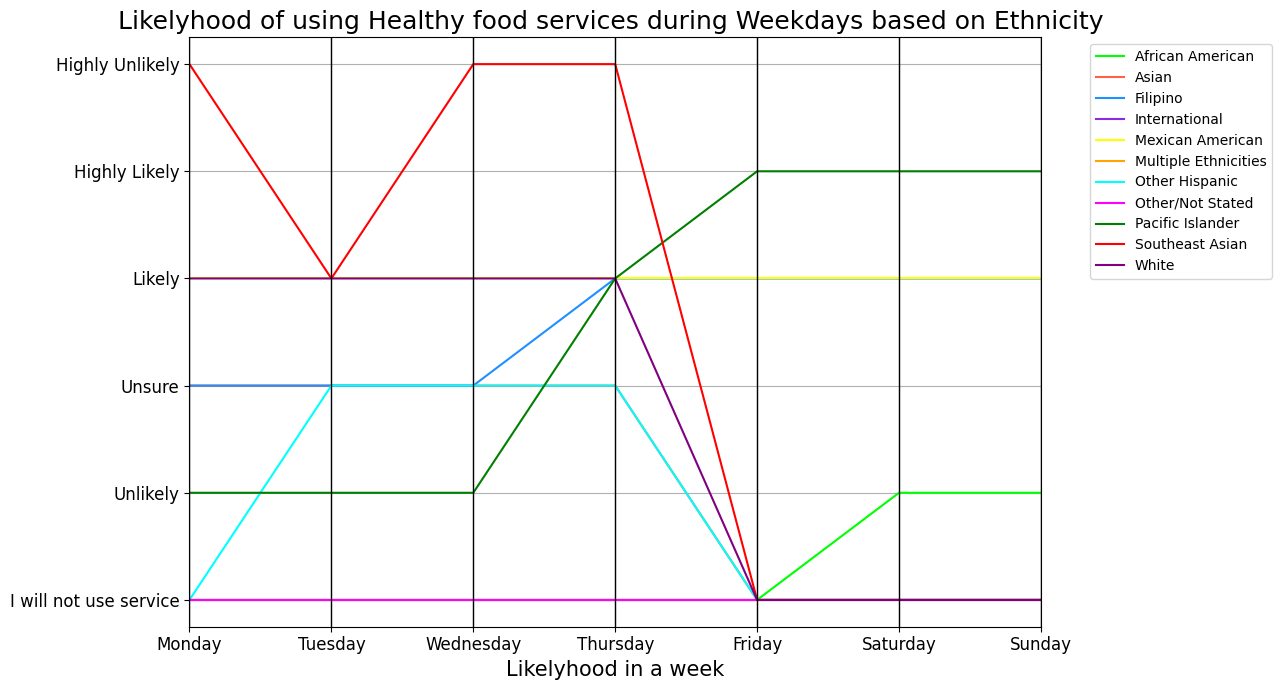

In [22]:
# Create the basic structure for a Parallel Coordinates plot using your new specialized data frame that you created above and add some customization components.
plt.figure(figsize=(13, 7))  # Set the figure size
parallel_coordinates(Common_visit_type_by_Ethnicity, 'Ethnicity', color=["lime", "tomato", "dodgerblue", "blueviolet", "yellow", "orange", "cyan", "magenta", "green", "red", "purple"]) # Designate custom colors for each category of the chosen group variable in the order in which you want them to be used. You could also choose a different categorical variable (nominal level of measurement) from the dataset if you wanted to or needed to.
plt.title("Likelyhood of using Healthy food services during Weekdays based on Ethnicity ",fontsize=18) # Use the title() function of matplotlib to add an optimal customized title to your DV (the "\n" will designate the text that follows it to be positioned on a new line).
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left') # Use the legend() function of matplotlib to move the legend outside of the plot so that we can see all of the lines in the chart. You can adjust the values to fine-tune its position.
plt.xticks(fontsize=12) #font size of x lables
plt.yticks(fontsize=12) #font size of x lables
plt.xlabel("Likelyhood in a week", fontsize=15)
# Save the plot with specific figure size and tight layout
plt.tight_layout()  # Adjust spacing between subplots
plt.savefig("A6-[Healthy Food Delivery]_ParallelCoordinatesPlot-Python.png") # Use the savefig() function of matplotlib to save the DV to a file called "StudentsPerformance-ParallelCoordinatesPlot-Python.png". If any text on your DV is cut off in your saved image, use the "right-click, copy output to clipboard, paste" method to insert DVs into assignment or reports.
plt.show() # To show the chart. You don't always need this; it depends on the development environment.

In [ ]:
# Create the basic structure for a Radar Chart (Polar Chart) and add some customization components.
# Data from the 'pivot1' DataFrame
categories = pivot2.columns.tolist()  # Get the category names
num_categories = len(categories)

# Extract the values as a numpy array
values = pivot1.values

# Number of rows in the DataFrame
num_rows = len(values)

# Calculate angles for each category
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Create a radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Plot data for each row
for i in range(num_rows):
    ax.plot(angles, values[i][:num_categories], linewidth=1, label=f'Data {i}')

ax.set_xticks(angles)
ax.set_xticklabels(days_of_week)
ax.set_yticklabels([])  # Hide radial labels (you can customize this)

# Add a legend
plt.legend(Q6_labels,loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the radar chart
plt.title("Radar Chart")
plt.show()
